In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

Inisialisasi libary yang dibutuhkan, library numpy untuk operasi numerik, pandas untuk manipulasi data, matplotlib untuk visualisasi, sklearn untuk implementasi atau membangun model Regresi DecisionTree

In [3]:
df = pd.read_csv('MaterialStrength.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())


      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   

        x11  x12       x13  x14  x15  target_feature  
0  1.538462    1  0.350044  YEs   NO           79.99  
1  1.560651    1  0.452416  yES  nOO           61.89  
2  1.569024    0  6.704743  yEs   NO           40.27  
3  1.569024    0  8.891596  yes  NOO           41.05  
4  1.185221    0  8.126411  YeS   no           44.30  


Membaca dataset MaterialStrength.csv dan menampilkan 5 baris data utama pada dataset

In [19]:
# Check for missing values
print(df.isnull().sum())

x1                0
x2                0
x3                0
x4                0
x5                0
x6                0
x7                0
x8                0
x9                0
x10               0
x11               0
x12               0
x13               0
x14               0
x15               0
target_feature    0
dtype: int64


Mengecek pada setiap kolom apakah ada yang mengandung missing values apa tidak ada

In [4]:
print(df.columns)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'target_feature'],
      dtype='object')


Menampilkan semua nama kolom pada dataset

In [5]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])  
    label_encoders[column] = le  


Bagian untuk mengonversi data kategorikal pada dataset menjadi bentuk numerik

In [6]:
X = df.drop('target_feature', axis=1)  
y = df['target_feature']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mengatur fitur X(independent variabel) dan Y (dependent variabel) . X disini yang digunakan semua kolom(x1,x2,x3,dan lain lain) kecuali Class, sedangkan pada Y yang digunakan adalah Class. Dan membagi dataset yang digunakan data training 80% dan testing 20%

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Pakai StandarScaler untuk melakukan scaling pada fitur agar berada dalam rentang yang sama secara standar.
Pakai fit_transform pada training buat menghitung standar deviasi dan menghitung rata-rata. Dan pakai transform pada testing agar dapat memiliki skala yang sama tidak perlu menghitung ulang deviasi dan rata-rata.

In [7]:
# Decision Tree Regression
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)


y_pred_dt = dt_regressor.predict(X_test)

# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_lr = linear_regressor.predict(X_test)

# Polynomial Regression (Basis Function Regression)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)
y_pred_poly = poly_regressor.predict(X_test_poly)

Melakukan Training regresi Decision Tree,Linear Regression, dan Polynomial Regression(Basis Function Regression) serta melakukan prediksi pada ketiga regressi tersebut

In [8]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Decision Tree Regression:")
print(f'MSE: {mse_dt:.2f}')
print(f'RMSE: {rmse_dt:.2f}')
print(f'R²: {r2_dt:.2f}')

print("\nLinear Regression:")
print(f'MSE: {mse_lr:.2f}')
print(f'RMSE: {rmse_lr:.2f}')
print(f'R²: {r2_lr:.2f}')

print("\nPolynomial Regression (Basis Function):")
print(f'MSE: {mse_poly:.2f}')
print(f'RMSE: {rmse_poly:.2f}')
print(f'R²: {r2_poly:.2f}')

Decision Tree Regression:
MSE: 20.95
RMSE: 4.58
R²: 0.92

Linear Regression:
MSE: 75.47
RMSE: 8.69
R²: 0.71

Polynomial Regression (Basis Function):
MSE: 34.77
RMSE: 5.90
R²: 0.87


Pada hasil metrik-metrik pada ketiga regressi dapat disimpulkan bahwa yang memiliki hasil terbaik adalah Regresi Decision Tree, karena nilai pada MSE dan RMSE hasilnya rendah yang berarti nilai rata2 kesalahan prediksinya lebih rendah, dan pada R^2 nya tinggi 92% yang berarti model tersebut sangat baik dalam menjelaskan hubungan antara variabel input dan output. 

Untuk linear regression hasil MSE dan RMSE sangat buruk dan kurang cocok untuk kasus pada dataset tersebut, dan Polynomial Regression(basis function) memiliki hasil metrik cukup baik namun tidak sebaik Decision Tree

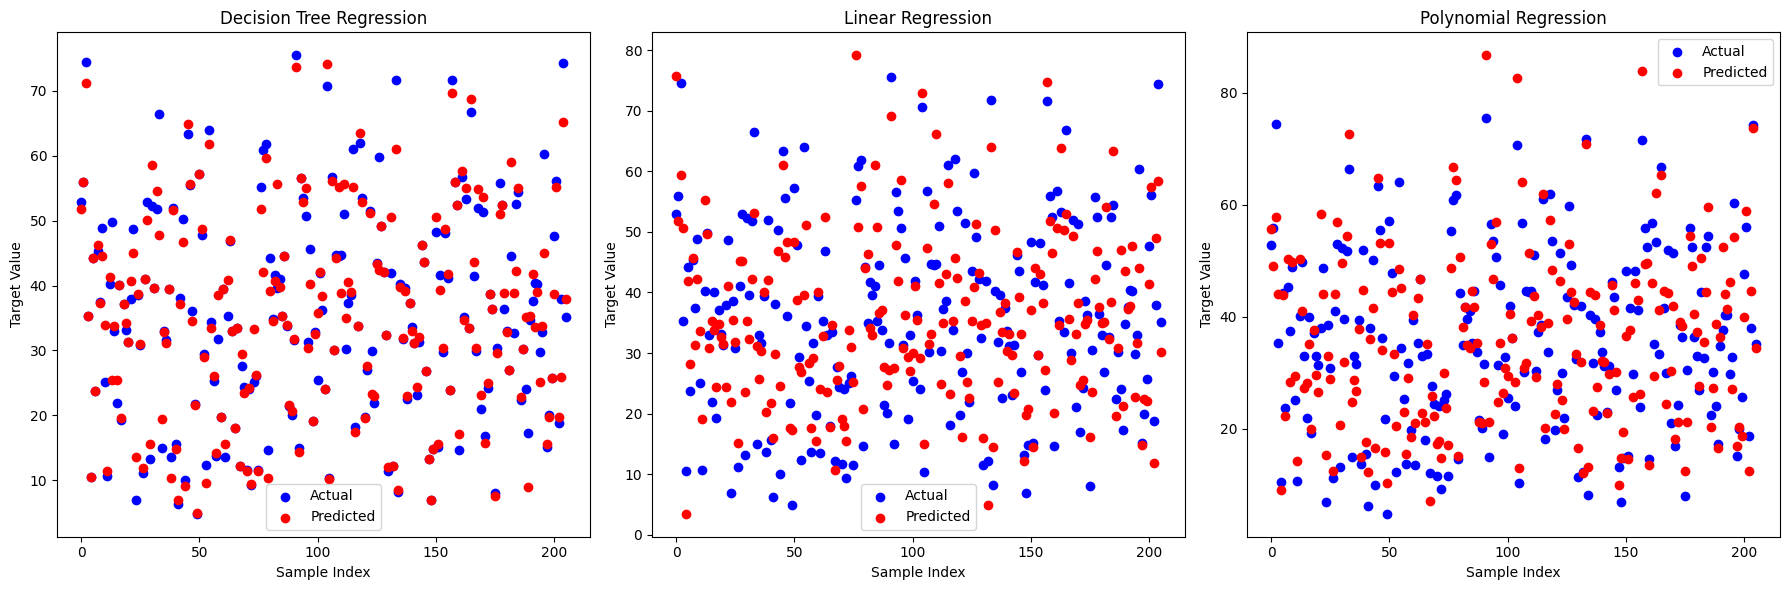

In [9]:
# Plot the results
plt.figure(figsize=(18, 6))

# Plot Decision Tree Regression
plt.subplot(1, 3, 1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred_dt, color='red', label='Predicted')
plt.title('Decision Tree Regression')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()

# Plot Linear Regression
plt.subplot(1, 3, 2)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred_lr, color='red', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()

# Plot Polynomial Regression
plt.subplot(1, 3, 3)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred_poly, color='red', label='Predicted')
plt.title('Polynomial Regression')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Pada perbandingan hasil ketiga visual tersebut dapat disimpulkan bahwa hasil perfoma terbaik diantara ketiga regresi tersebut adalah regresi Decision Tree, karena lebih banyak titik merah(predicted) mendekati titik biru(actual). Untuk linear regression memiliki hasil perfoma buruk karena titik merah dan birunya pada bertebaran yang berarti nilai predicted menjauhi dari nilai actual. Sedangkan Polynomial regression hasil perfomanya lebih baik daripada linear regression tetapi kurang stabil daripada decision tree